### Importing necessary libraries

In [2]:
import os
import glob
import seaborn as sns
# Apply the default seaborn theme, scaling and color palette
sns.set()
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import random
%matplotlib inline
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn import tree
os.chdir("C:/Piyush/Study/Great Learning/Hackathons/Files/Train Data/Train Data Zip")

### Combining all files in directory on a common column

In [3]:
#Loading the dataset
frequency_domain_features_train = pd.read_csv("C:/Piyush/Study/Great Learning/Hackathons/Files/Train Data/Train Data Zip/frequency_domain_features_train.csv")
heart_rate_non_linear_features_train = pd.read_csv("C:/Piyush/Study/Great Learning/Hackathons/Files/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv")
time_domain_features_train = pd.read_csv("C:/Piyush/Study/Great Learning/Hackathons/Files/Train Data/Train Data Zip/time_domain_features_train.csv")


#### no of records in 'frequency_domain_features_train.csv'

In [4]:
frequency_domain_features_train.count()

uuid       369289
VLF        369289
VLF_PCT    369289
LF         369289
LF_PCT     369289
LF_NU      369289
HF         369289
HF_PCT     369289
HF_NU      369289
TP         369289
LF_HF      369289
HF_LF      369289
dtype: int64

#### no of records in 'heart_rate_non_linear_features_train.csv'

In [5]:
heart_rate_non_linear_features_train.count()

uuid         369289
SD1          369289
SD2          369289
sampen       369289
higuci       369289
datasetId    369289
condition    369289
dtype: int64

#### no of records in 'time_domain_features_train.csv'

In [6]:
time_domain_features_train.count()

MEAN_RR              369289
MEDIAN_RR            369289
SDRR                 369289
RMSSD                369289
SDSD                 369289
SDRR_RMSSD           369289
HR                   369289
pNN25                369289
pNN50                369289
KURT                 369289
SKEW                 369289
MEAN_REL_RR          369289
MEDIAN_REL_RR        369289
SDRR_REL_RR          369289
RMSSD_REL_RR         369289
SDSD_REL_RR          369289
SDRR_RMSSD_REL_RR    369289
KURT_REL_RR          369289
SKEW_REL_RR          369289
uuid                 369289
dtype: int64

#### combining the above 3 files based on common column 'uuid'

In [7]:
combined_data = frequency_domain_features_train.merge(heart_rate_non_linear_features_train, how='left', on='uuid')
combined_data = combined_data.merge(time_domain_features_train, how='left', on='uuid')

#### Saving the combined data to a csv

In [8]:
combined_data.to_csv( "combined_csv_new.csv", index=False, encoding='utf-8-sig')

In [9]:
combined_data = pd.read_csv("C:/Piyush/Study/Great Learning/Hackathons/Files/Train Data/Train Data Zip/combined_csv_new.csv", index_col=[0])

#### Printing the data info for combined data

In [10]:
print(combined_data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 369289 entries, 89df2855-56eb-4706-a23b-b39363dd605a to 1f2eb52d-4f09-4921-a383-ef1bc6221789
Data columns (total 36 columns):
VLF                  369289 non-null float64
VLF_PCT              369289 non-null float64
LF                   369289 non-null float64
LF_PCT               369289 non-null float64
LF_NU                369289 non-null float64
HF                   369289 non-null float64
HF_PCT               369289 non-null float64
HF_NU                369289 non-null float64
TP                   369289 non-null float64
LF_HF                369289 non-null float64
HF_LF                369289 non-null float64
SD1                  369289 non-null float64
SD2                  369289 non-null float64
sampen               369289 non-null float64
higuci               369289 non-null float64
datasetId            369289 non-null int64
condition            369289 non-null object
MEAN_RR              369289 non-null float64
MEDIAN_RR            3

#### Print the first 10 rows of the dataframe

In [11]:
combined_data.head(10)

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
uuid,,,,,,,,,,,,,,,,,,,,,
89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252
fe7b4ab0-42d3-48d0-8479-7b022d6af0bc,3300.245844,95.316204,151.145149,4.365306,93.200171,11.027460,0.318490,6.799829,3462.418453,13.706252,...,-0.893858,1.026302,0.000750,0.000210,0.011061,0.005987,0.005987,1.847605,-0.893858,1.026302
d324b1ee-aaa1-4edb-9b46-c597cb0bbd8c,758.674608,61.022078,483.114475,38.858094,99.692575,1.489796,0.119828,0.307425,1243.278879,324.282351,...,-0.442670,0.102908,-0.000124,-0.000583,0.010997,0.004772,0.004772,2.304640,-0.442670,0.102908
cf272c21-98d8-45c1-9e2b-5ed1fe1864bd,1458.810124,75.758666,437.878087,22.739806,93.805918,28.913453,1.501528,6.194082,1925.601664,15.144441,...,5.224736,2.452996,0.000031,0.000038,0.013206,0.006843,0.006843,1.929994,5.224736,2.452996
c65dcfb0-1774-4a2a-aa45-271083faeeaa,2124.918400,67.479320,1003.315816,31.861491,97.973018,20.757787,0.659188,2.026982,3148.992003,48.334430,...,-0.455008,-0.371959,-0.000187,0.000714,0.018204,0.008242,0.008242,2.208637,-0.455008,-0.371959


#### Trying to see the overview of the combined data by use of described() method

In [12]:
combined_data.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,...,369289.000000,369289.000000,3.692890e+05,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,2199.580170,64.289242,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,...,0.523235,0.041628,-1.756587e-06,-0.000465,0.018571,0.009701,0.009701,2.006817,0.523235,0.041628
std,1815.773422,16.774844,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,...,1.790348,0.699522,1.630256e-04,0.000868,0.005455,0.003897,0.003897,0.375845,1.790348,0.699522
min,159.480176,19.031219,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,...,-1.894820,-2.136278,-1.233914e-03,-0.004425,0.008987,0.003220,0.003220,1.169342,-1.894820,-2.136278
25%,1001.189280,52.909877,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,...,-0.352783,-0.359291,-7.281695e-05,-0.000917,0.014261,0.006984,0.006984,1.749801,-0.352783,-0.359291
50%,1667.903111,66.350237,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,...,0.040736,-0.060966,-9.330777e-07,-0.000312,0.017318,0.008691,0.008691,1.934416,0.040736,-0.060966
75%,2654.121052,76.825032,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,...,0.722833,0.282417,6.911667e-05,0.000131,0.021827,0.011460,0.011460,2.221232,0.722833,0.282417
max,12617.977191,97.738848,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,...,64.088107,6.777800,1.244098e-03,0.002095,0.036571,0.026955,0.026955,3.724134,64.088107,6.777800


#### removing the column 'datasetId' as I didn't find it of any use

In [13]:
combined_data = combined_data.drop(['datasetId'],axis=1)

#### Finding some additional data insights in 'combined data'

In [14]:
listItem = []

for col in combined_data.columns:
    listItem.append(
        [col,combined_data[col].dtype, 
                     combined_data[col].isna().sum(), 
                     round((combined_data[col].isna().sum()/len(combined_data[col]))*100,2),
                     combined_data[col].nunique(),
                     combined_data[col].unique()
        ]
    )
combined_data_colDesc = pd.DataFrame(columns=['Column Name','dtype','Null Value count','Null Value Percentage','Unique count','Unique items'],data=listItem)
combined_data_colDesc

,Column Name,dtype,Null Value count,Null Value Percentage,Unique count,Unique items
0,VLF,float64,0,0.0,369289,"[2661.894135631906, 2314.265450332005, 1373.88..."
1,VLF_PCT,float64,0,0.0,369289,"[72.20328671413414, 76.97572806666177, 51.1522..."
2,LF,float64,0,0.0,369289,"[1009.249419006743, 690.1132747865352, 1298.22..."
3,LF_PCT,float64,0,0.0,369289,"[27.375666143581746, 22.95413940848525, 48.335..."
4,LF_NU,float64,0,0.0,369289,"[98.48526285120838, 99.69539742643744, 98.9504..."
5,HF,float64,0,0.0,369289,"[15.52260250018865, 2.108525418184262, 13.7697..."
6,HF_PCT,float64,0,0.0,369289,"[0.4210471422841141, 0.07013252485297729, 0.51..."
7,HF_NU,float64,0,0.0,369289,"[1.514737148791649, 0.3046025735625027, 1.0495..."
8,TP,float64,0,0.0,369289,"[3686.666157138838, 3006.487250536725, 2685.87..."
9,LF_HF,float64,0,0.0,369289,"[65.0180547362775, 327.2966352859147, 94.28090..."


#### Correlation for combined data

In [15]:
combined_data.corr()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
VLF,1.000000,0.676628,0.026521,-0.664830,0.105044,-0.010441,-0.389684,-0.105044,0.951800,0.126668,...,-0.050392,0.236819,-0.026638,0.237918,0.242427,0.087994,0.087993,0.303226,-0.050392,0.236819
VLF_PCT,0.676628,1.000000,-0.541976,-0.995240,0.046868,-0.283068,-0.460465,-0.046868,0.470337,0.103768,...,0.090900,0.228209,0.002054,0.588470,-0.343214,-0.333824,-0.333824,0.277593,0.090900,0.228209
LF,0.026521,-0.541976,1.000000,0.570404,0.247482,0.315662,-0.032871,-0.247482,0.331037,0.099452,...,-0.144318,-0.075650,-0.022014,-0.550557,0.783464,0.524338,0.524337,0.077445,-0.144318,-0.075650
LF_PCT,-0.664830,-0.995240,0.570404,1.000000,0.043265,0.216789,0.371761,-0.043265,-0.452276,-0.082040,...,-0.106355,-0.238718,-0.003950,-0.602589,0.327483,0.288087,0.288087,-0.215372,-0.106355,-0.238718
LF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,-0.749237,-0.840496,-1.000000,0.155373,0.281325,...,-0.216003,-0.205864,-0.036098,-0.121910,-0.247067,-0.582438,-0.582438,0.760120,-0.216003,-0.205864
HF,-0.010441,-0.283068,0.315662,0.216789,-0.749237,1.000000,0.721758,0.749237,0.107987,-0.220058,...,0.085113,0.184903,0.018999,-0.168666,0.732687,0.883734,0.883735,-0.581391,0.085113,0.184903
HF_PCT,-0.389684,-0.460465,-0.032871,0.371761,-0.840496,0.721758,1.000000,0.840496,-0.360688,-0.241191,...,0.102859,0.000527,0.016413,-0.116853,0.286441,0.555832,0.555832,-0.682511,0.102859,0.000527
HF_NU,-0.105044,-0.046868,-0.247482,-0.043265,-1.000000,0.749237,0.840496,1.000000,-0.155373,-0.281325,...,0.216003,0.205864,0.036098,0.121910,0.247067,0.582438,0.582438,-0.760120,0.216003,0.205864
TP,0.951800,0.470337,0.331037,-0.452276,0.155373,0.107987,-0.360688,-0.155373,1.000000,0.144087,...,-0.088653,0.205367,-0.031273,0.056277,0.480078,0.260477,0.260477,0.295681,-0.088653,0.205367
LF_HF,0.126668,0.103768,0.099452,-0.082040,0.281325,-0.220058,-0.241191,-0.281325,0.144087,1.000000,...,-0.074650,-0.080524,0.001502,-0.054756,-0.069479,-0.204986,-0.204986,0.428285,-0.074650,-0.080524


#### heatmap for correlation of combined data

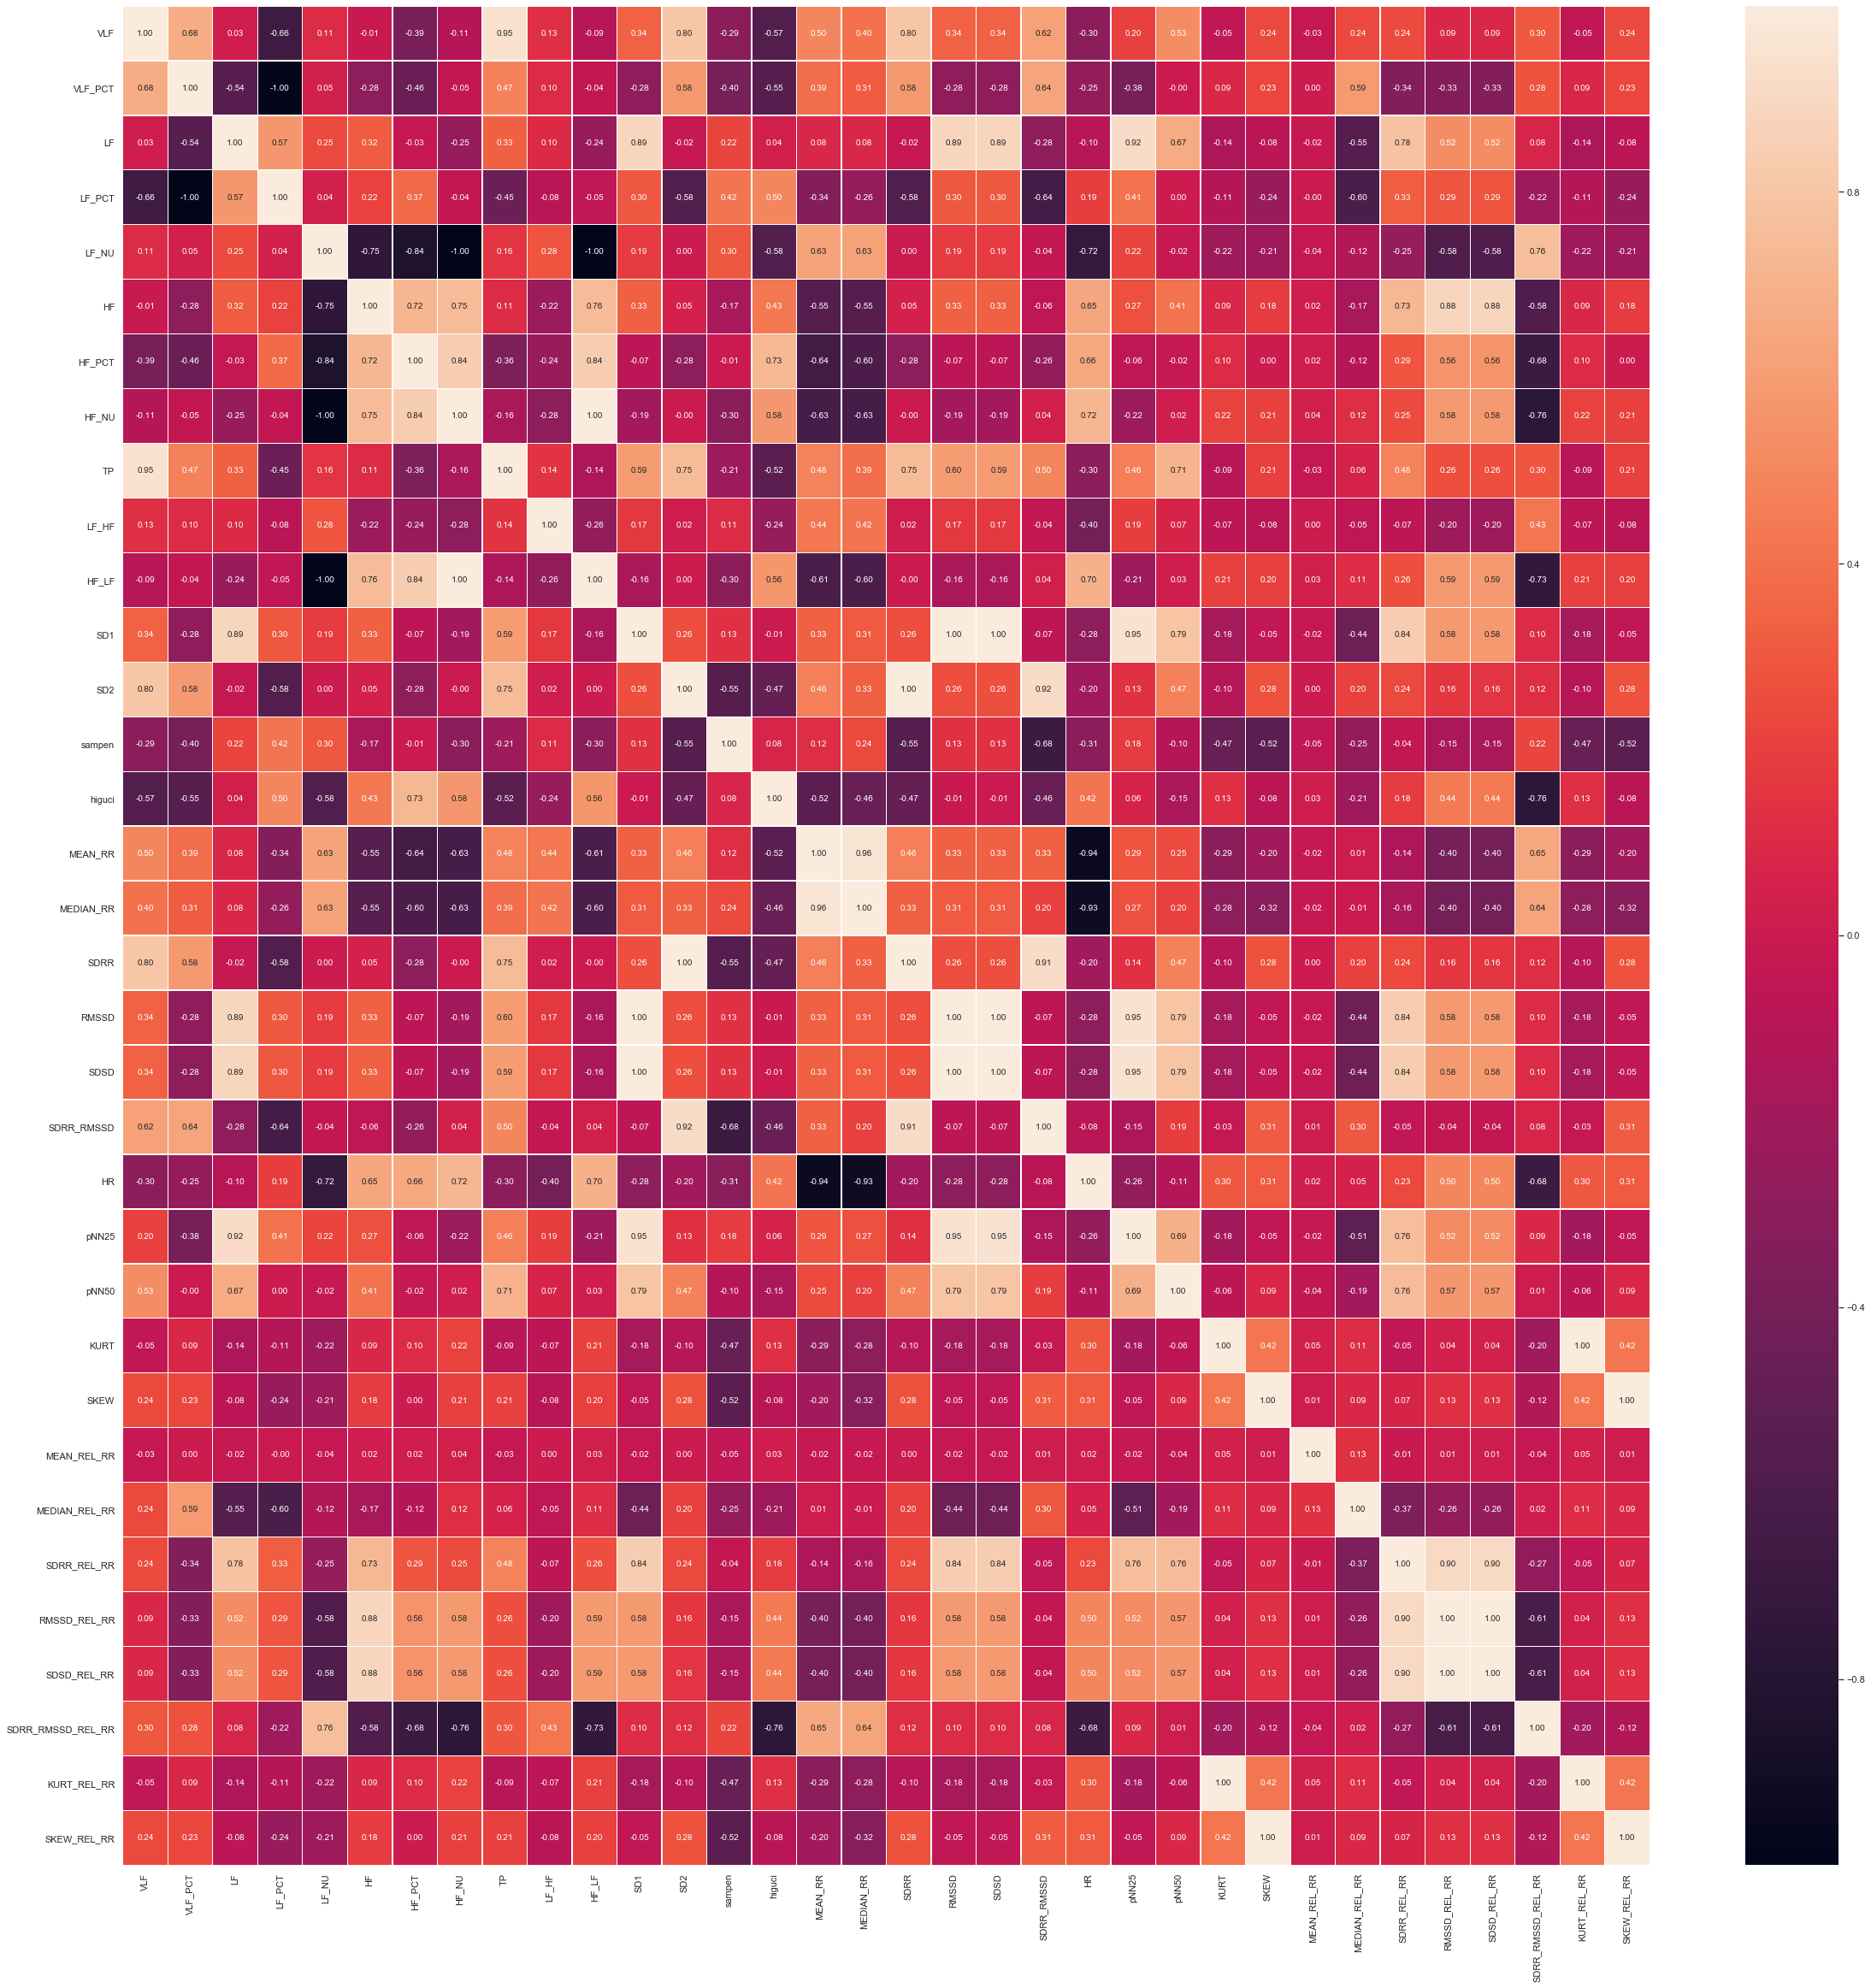

In [16]:
f, ax = plt.subplots(figsize=(40,40))
sns.heatmap(combined_data.corr(),annot=True, linewidths=.4,fmt='.2f',ax=ax)
plt.show()

#### pairplot of combined data

In [17]:
#sns.pairplot(combined_data,diag_kind='kde',hue='HR')

### Begin Model Building

In [18]:
#combined_data_new = combined_data.drop('uuid', axis = 1)


In [19]:
combined_data_copy = combined_data.copy(deep = True)

In [20]:
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()
label1 = encode.fit_transform(combined_data['condition'])
combined_data_copy['condition'] = label1
combined_data_copy['condition'] = combined_data_copy['condition'].astype('category')

#### Feature Selection

##### split into train and test sets

In [21]:
#Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

# Target value is statuss
y = combined_data_copy[['HR']]

# Feature set is remaining features
X = combined_data_copy.drop('HR', axis = 1)

y.head()
X.head()

# No scaling for tree based algorithmns

# Split the data as a train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Show the results of the split
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)
print(X.head())
print(y.head())

(258502, 34) (110787, 34) (258502, 1) (110787, 1)
                                              VLF    VLF_PCT           LF  \
uuid                                                                        
89df2855-56eb-4706-a23b-b39363dd605a  2661.894136  72.203287  1009.249419   
80c795e4-aa56-4cc0-939c-19634b89cbb2  2314.265450  76.975728   690.113275   
c2d5d102-967c-487d-88f2-8b005a449f3e  1373.887112  51.152225  1298.222619   
37eabc44-1349-4040-8896-0d113ad4811f  2410.357408  70.180308  1005.981659   
aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  1151.177330  43.918366  1421.782051   

                                         LF_PCT      LF_NU         HF  \
uuid                                                                    
89df2855-56eb-4706-a23b-b39363dd605a  27.375666  98.485263  15.522603   
80c795e4-aa56-4cc0-939c-19634b89cbb2  22.954139  99.695397   2.108525   
c2d5d102-967c-487d-88f2-8b005a449f3e  48.335104  98.950472  13.769729   
37eabc44-1349-4040-8896-0d113ad4811f  29.2903

### Model Built Using All Features

In [22]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.958


### Model Built Using Correlation Features

In [23]:
# configure to select a subset of features
fs = SelectKBest(score_func=f_regression, k=10)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


In [24]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 1.622


### Model Built Using Mutual Information Features

In [26]:
# configure to select a subset of features
fs = SelectKBest(score_func=mutual_info_regression, k=10)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

MemoryError: 

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

### Tune the Number of Selected Features

In [ ]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y.values.ravel())
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))